## Component Maps
This notebook will demonstrate the correctness of the component maps that will form $f_a$.

To configure the environment you may need to run:
```
poetry env activate
poetry env info --path
```

Then select from the menu within Jupyter.

In [15]:
# Import relevant modules
# So that graphs do not display in their own window we use %matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from zippy.f_a import F_a
from zippy.point import Point
from zippy.utils import generate_complex, f3sqrt, get_color

## Visualizing complex functions
A complex number has two components, so visualizing graphs of complex functions is difficult because we cannot visualize four-dimensional space. Instead, we will associate each point in the complex plane with a color. In the next cell, you can see the color scheme that we are using.

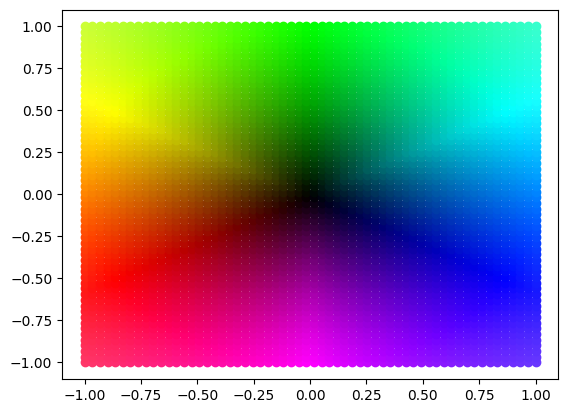

In [16]:
points = generate_complex(-1, 1, -1, 1, 30)
for point in points:
    plt.plot(point.real, point.imag, 'o', color=get_color(point))

## Branch cuts
Part of the map $f_3$ involves taking a square root. We must use the appropriate branch cut in order to ensure that our implementaion behaves as expected. First, to understand what a branch cut is, here are some resources:
- [LibreText Article](https://phys.libretexts.org/Bookshelves/Mathematical_Physics_and_Pedagogy/Complex_Methods_for_the_Sciences_(Chong)/08%3A_Branch_Points_and_Branch_Cuts/8.02%3A_Branches#:~:text=Branches%20of%20the%20complex%20square%20root,-As%20we%20saw&text=Define%20a%20branch%20cut%20along,z%20along%20the%20branch%20cut.)
- [Understanding Branch Cuts in the Complex Plane](https://flothesof.github.io/branch-cuts-with-square-roots.html)

We need to choose how we are going to represent the $\theta$ component of each point in the complex plane. That is, we may represent every $a + bi$ as $re^{i\theta}$ and $\theta$ could be represented as $\theta + 2\pi n$ for any integer $n$. The principal branch is $(-\pi, \pi]$, and this is demonstrated below.

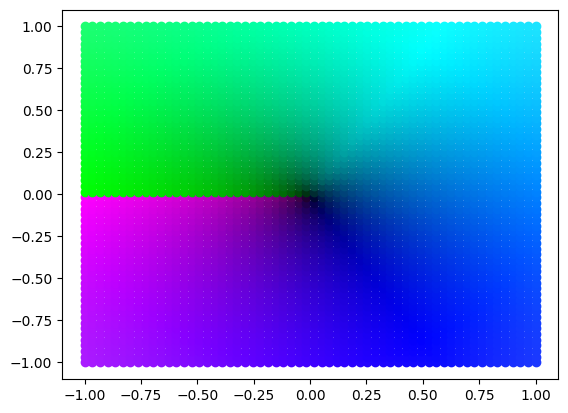

In [17]:
points = generate_complex(-1, 1, -1, 1, 30)
for point in points:
    s = np.sqrt(point)
    plt.plot(point.real, point.imag, 'o', color=get_color(s))

The implementation of The Geodisc Algorithm requires that we use a square root function with a branch cut along $(0, \infty)$, otherwise, our $\theta$ values are in the range $(0, 2\pi]$. Using a custom version of the square root function, we can get the desired branch cut as seen below.

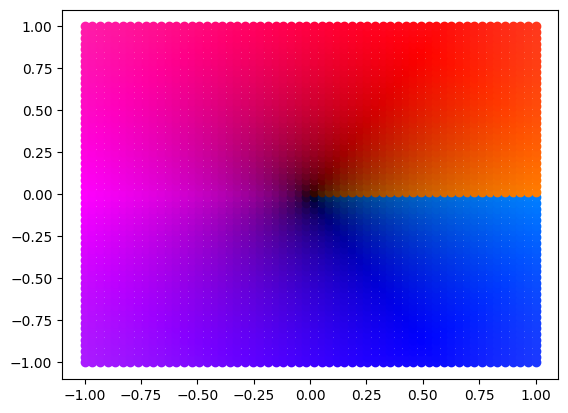

In [18]:
points = generate_complex(-1, 1, -1, 1, 30)
for point in points:
    s = f3sqrt(point)
    plt.plot(point.real, point.imag, 'o', color=get_color(s))